# Import Nessesory Libries

In [1]:
# import all the nessecery libries for machine learning project
import pandas as pd

# Import Data Sets

In [2]:
# Import data set
outlet_data=pd.read_csv('Data Storn - Semi final data sets/outlets_data.csv')
freezer_data=pd.read_csv('Data Storn - Semi final data sets/freezer_data.csv')
product_data=pd.read_csv('Data Storn - Semi final data sets/product_data.csv')
sales_data=pd.read_csv('Data Storn - Semi final data sets/sales_data.csv')
week_data=pd.read_csv('Data Storn - Semi final data sets/week_data.csv')



In [3]:
outlet_data

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [24]:
# get count of null values in each column
null_counts = outlet_data.isnull().sum()
# print the counts
print(null_counts)

Outlet_ID     0
area(sqft)    0
dtype: int64


In [4]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [5]:
sales_data

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0
...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0


In [22]:
# get count of null values in each column
null_counts = sales_data.isnull().sum()
# print the counts
print(null_counts)

Outlet_ID       0
week            0
pid             0
product_name    0
no_units        0
dtype: int64


In [6]:
week_data

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023
2,Week 3,1/16/2023,1/22/2023
3,Week 4,1/23/2023,1/29/2023
4,Week 5,1/30/2023,2/5/2023
5,Week 6,2/6/2023,2/12/2023
6,Week 7,2/13/2023,2/19/2023
7,Week 8,2/20/2023,2/26/2023
8,Week 9,2/27/2023,3/5/2023
9,Week 10,3/6/2023,3/12/2023


In [23]:
# get count of null values in each column
null_counts = week_data.isnull().sum()
# print the counts
print(null_counts)

Week          0
Start Date    0
End Date      0
dtype: int64


# Creating Dtaframes

#### create a data frame for each outlate and product

In [7]:
# create a data frame for each outlate and product
sales_grouped_outlats = sales_data.groupby(['Outlet_ID', 'pid'])['no_units'].sum().reset_index()


In [8]:
sales_grouped_outlats

,Outlet_ID,pid,no_units
0,ID1008,IP1,6970.0
1,ID1008,IP2,7206.0
2,ID1008,IP3,6285.0
3,ID1008,IP4,6486.0
4,ID1008,IP5,6055.0
...,...,...,...
7185,ID9980,IP1,6212.0
7186,ID9980,IP2,7888.0
7187,ID9980,IP3,4999.0
7188,ID9980,IP4,9370.0


In [9]:
# pivot the dataframe to make item_description values as columns
pivoted_df_sales = sales_grouped_outlats.pivot(index='Outlet_ID', columns='pid', values='no_units')

# fill NaN values with 0
pivoted_df_sales.fillna(0, inplace=True)

# resetting the index
pivoted_df_sales = pivoted_df_sales.reset_index()

In [10]:
pivoted_df_sales

pid,Outlet_ID,BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5
0,ID1008,0.0,0.0,0.0,0.0,0.0,6970.0,7206.0,6285.0,6486.0,6055.0
1,ID1012,636.0,713.0,795.0,572.0,559.0,0.0,0.0,0.0,0.0,0.0
2,ID1024,1703.0,1251.0,1150.0,1388.0,1451.0,0.0,0.0,0.0,0.0,0.0
3,ID1029,1659.0,2190.0,1891.0,1513.0,1109.0,9166.0,7577.0,9158.0,7961.0,6918.0
4,ID1036,567.0,583.0,725.0,564.0,722.0,4934.0,5708.0,6200.0,5526.0,5835.0
...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,1815.0,1878.0,1359.0,1958.0,2257.0,7142.0,6123.0,8809.0,5699.0,11328.0
947,ID9971,0.0,0.0,0.0,0.0,0.0,6390.0,6784.0,7786.0,9162.0,6361.0
948,ID9973,1411.0,1970.0,2001.0,1317.0,1870.0,7341.0,6473.0,8091.0,9850.0,7744.0
949,ID9979,0.0,0.0,0.0,0.0,0.0,5596.0,7372.0,6283.0,5740.0,6901.0


In [11]:
# add columns for each product to the outlet data frame

sales_grouped_outlats=(pd.merge(outlet_data, pivoted_df_sales, on='Outlet_ID', how='left'))

In [12]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5
0,ID7203,5660,0.0,0.0,0.0,0.0,0.0,6361.0,7295.0,9127.0,5520.0,6443.0
1,ID1878,4138,0.0,0.0,0.0,0.0,0.0,7860.0,6622.0,6856.0,7954.0,6748.0
2,ID1740,5546,0.0,0.0,0.0,0.0,0.0,7625.0,8116.0,7837.0,7192.0,6817.0
3,ID4366,5134,0.0,0.0,0.0,0.0,0.0,6530.0,6259.0,9232.0,8759.0,9524.0
4,ID8358,4100,0.0,0.0,0.0,0.0,0.0,7057.0,9562.0,7652.0,6241.0,8866.0
...,...,...,...,...,...,...,...,...,...,...,...,...
983,ID4119,3858,624.0,508.0,631.0,602.0,573.0,4179.0,5104.0,3951.0,4503.0,6038.0
984,ID2978,3495,634.0,503.0,655.0,682.0,679.0,4092.0,5710.0,4934.0,5006.0,4800.0
985,ID6549,1141,742.0,611.0,677.0,716.0,543.0,4932.0,6148.0,4826.0,5844.0,5935.0
986,ID1210,3322,519.0,532.0,664.0,608.0,677.0,4745.0,7020.0,5510.0,5246.0,5113.0


#### creating fetures for total item solds for bulk and impuls item

In [13]:
sales_grouped_outlats['tot_bulk_itm'] = sales_grouped_outlats[['BP1', 'BP2', 'BP3', 'BP4', 'BP5']].sum(axis=1)
sales_grouped_outlats['tot_impulse_itm'] = sales_grouped_outlats[['IP1', 'IP2', 'IP3', 'IP4', 'IP5']].sum(axis=1)

In [14]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm
0,ID7203,5660,0.0,0.0,0.0,0.0,0.0,6361.0,7295.0,9127.0,5520.0,6443.0,0.0,34746.0
1,ID1878,4138,0.0,0.0,0.0,0.0,0.0,7860.0,6622.0,6856.0,7954.0,6748.0,0.0,36040.0
2,ID1740,5546,0.0,0.0,0.0,0.0,0.0,7625.0,8116.0,7837.0,7192.0,6817.0,0.0,37587.0
3,ID4366,5134,0.0,0.0,0.0,0.0,0.0,6530.0,6259.0,9232.0,8759.0,9524.0,0.0,40304.0
4,ID8358,4100,0.0,0.0,0.0,0.0,0.0,7057.0,9562.0,7652.0,6241.0,8866.0,0.0,39378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,ID4119,3858,624.0,508.0,631.0,602.0,573.0,4179.0,5104.0,3951.0,4503.0,6038.0,2938.0,23775.0
984,ID2978,3495,634.0,503.0,655.0,682.0,679.0,4092.0,5710.0,4934.0,5006.0,4800.0,3153.0,24542.0
985,ID6549,1141,742.0,611.0,677.0,716.0,543.0,4932.0,6148.0,4826.0,5844.0,5935.0,3289.0,27685.0
986,ID1210,3322,519.0,532.0,664.0,608.0,677.0,4745.0,7020.0,5510.0,5246.0,5113.0,3000.0,27634.0


#### Creatng feature for Total Icecream Volume sold

In [15]:
sales_grouped_outlats['tot_icecream_vol']=(sales_grouped_outlats['tot_bulk_itm']*1.0)+(sales_grouped_outlats['tot_impulse_itm']*0.2)

In [16]:
sales_grouped_outlats[['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm']] = sales_grouped_outlats[['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm']].astype(int)

In [17]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,ID4119,3858,624,508,631,602,573,4179,5104,3951,4503,6038,2938,23775,7693.0
984,ID2978,3495,634,503,655,682,679,4092,5710,4934,5006,4800,3153,24542,8061.4
985,ID6549,1141,742,611,677,716,543,4932,6148,4826,5844,5935,3289,27685,8826.0
986,ID1210,3322,519,532,664,608,677,4745,7020,5510,5246,5113,3000,27634,8526.8


#### Create a feature for total revenew

In [18]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [19]:
sales_grouped_outlats['tot_revnew']=((sales_grouped_outlats['BP1']*1200)+(sales_grouped_outlats['BP2']*1100)+(sales_grouped_outlats['BP3']*1150)+(sales_grouped_outlats['BP4']*1000)+(sales_grouped_outlats['BP5']*1100)+(sales_grouped_outlats['IP1']*100)+(sales_grouped_outlats['IP2']*90)+(sales_grouped_outlats['IP3']*110)+(sales_grouped_outlats['IP4']*100)+(sales_grouped_outlats['IP5']*100)).astype(float)

In [20]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,ID4119,3858,624,508,631,602,573,4179,5104,3951,4503,6038,2938,23775,7693.0,5631520.0
984,ID2978,3495,634,503,655,682,679,4092,5710,4934,5006,4800,3153,24542,8061.4,5942690.0
985,ID6549,1141,742,611,677,716,543,4932,6148,4826,5844,5935,3289,27685,8826.0,6409630.0
986,ID1210,3322,519,532,664,608,677,4745,7020,5510,5246,5113,3000,27634,8526.8,6072600.0


### Encode

In [25]:
sales_grouped_outlats['Outlet_ID'] = sales_grouped_outlats['Outlet_ID'].str.replace(r'^ID', '').astype(int)

C:\Users\gw\AppData\Local\Temp\ipykernel_21996\777021382.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sales_grouped_outlats['Outlet_ID'] = sales_grouped_outlats['Outlet_ID'].str.replace(r'^ID', '').astype(int)


In [26]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew
0,7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,3492920.0
1,1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,3606340.0
2,1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,3755910.0
3,4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,4060130.0
4,8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,3918700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,4119,3858,624,508,631,602,573,4179,5104,3951,4503,6038,2938,23775,7693.0,5631520.0
984,2978,3495,634,503,655,682,679,4092,5710,4934,5006,4800,3153,24542,8061.4,5942690.0
985,6549,1141,742,611,677,716,543,4932,6148,4826,5844,5935,3289,27685,8826.0,6409630.0
986,1210,3322,519,532,664,608,677,4745,7020,5510,5246,5113,3000,27634,8526.8,6072600.0


In [39]:
sales_grouped_outlats.describe()

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,tot_revnew
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,9.880000e+02
mean,5502.878543,4288.656883,1007.068826,1012.464575,996.657895,991.341093,998.986842,5567.767206,5589.291498,5616.090081,5523.851215,5565.410931,5006.519231,27862.410931,10579.001417,8.345086e+06
std,2556.816554,2451.617799,811.767038,823.204060,797.646455,793.685750,806.067474,3849.303819,3875.716247,3924.304325,3810.738688,3898.092720,3931.820648,18641.720323,6262.537084,5.292397e+06
min,1008.000000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2601.000000,1.637760e+06
25%,3367.750000,2325.750000,460.500000,482.750000,473.000000,485.750000,475.250000,3278.750000,3408.750000,3299.500000,3264.750000,3184.750000,2828.000000,19247.000000,6545.450000,3.659145e+06
50%,5562.500000,3958.500000,727.500000,723.000000,729.000000,747.000000,722.000000,5844.500000,5877.000000,5982.000000,5913.500000,5858.000000,3386.500000,30587.000000,7850.900000,6.345300e+06
75%,7598.500000,5836.000000,1653.500000,1627.250000,1646.250000,1622.250000,1607.750000,8286.500000,8261.000000,8136.250000,8081.500000,8154.500000,8501.250000,41500.000000,16868.000000,1.363164e+07
max,9980.000000,9950.000000,4328.000000,4843.000000,4765.000000,4561.000000,5161.000000,17528.000000,19887.000000,20067.000000,20386.000000,18517.000000,23658.000000,85680.000000,40760.000000,3.477513e+07


In [27]:
# Print list of features
print(sales_grouped_outlats.columns.tolist())

['Outlet_ID', 'area(sqft)', 'BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'IP1', 'IP2', 'IP3', 'IP4', 'IP5', 'tot_bulk_itm', 'tot_impulse_itm', 'tot_icecream_vol', 'tot_revnew']


# Visualization

# Training the Model

In [ ]:
# import pandas as pd
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Load the data
# df = sales_grouped_outlats

# # Select the features to use
# features = ['Outlet_ID', 'area(sqft)', 'BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'IP1', 'IP2', 'IP3', 'IP4', 'IP5', 'tot_bulk_itm', 'tot_impulse_itm', 'tot_icecream_vol', 'tot_revnew']

# # Create the KMeans model
# model = KMeans(n_clusters=10)

# # Fit the model to the data
# model.fit(df[features])

# # Predict the cluster labels for each data point
# labels = model.predict(df[features])

# plt.scatter('Outlet_ID', 'area(sqft)', c=10)
# plt.show()


In [50]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data from csv file into pandas DataFrame
data = sales_grouped_outlats

features = ['area(sqft)', 'BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'IP1', 'IP2', 'IP3', 'IP4', 'IP5', 'tot_bulk_itm', 'tot_impulse_itm', 'tot_icecream_vol', 'tot_revnew']


n_clusters=10
iterations=500

# Select features for k-means clustering
X = data[features]

# Initialize and fit k-means clustering model
kmeans = KMeans(n_clusters=10,init='k-means++', n_init=2000, max_iter=500,tol=0.000001 ) # set number of clusters
kmeans.fit(X)

# Get predicted cluster labels and centroids
labels = kmeans.predict(X)




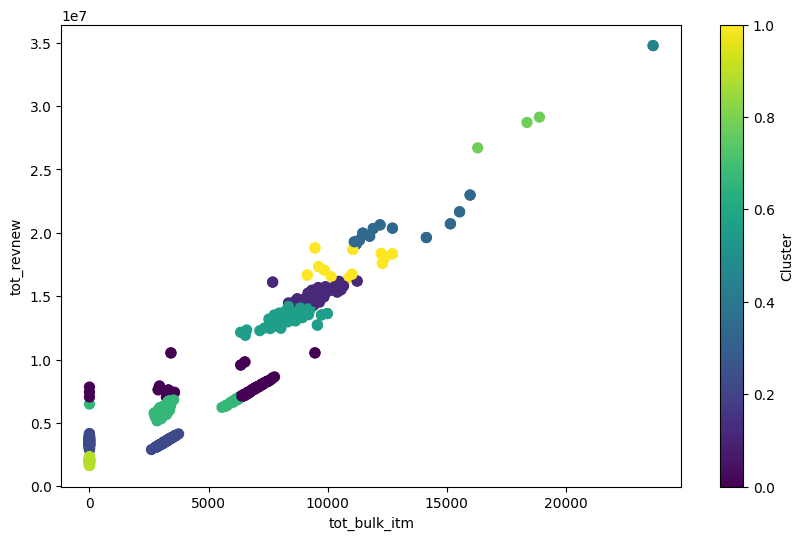

In [52]:
# Create scatter plot with feature_1 on x-axis and feature_2 on y-axis

featur_1 = 'tot_bulk_itm'
featur_2 = 'tot_revnew'

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[featur_1], data[featur_2], c=labels, s=50, cmap='viridis')

# Add legend with cluster labels
scatter = ax.scatter([],[], c=[], cmap='viridis')
plt.colorbar(scatter, label='Cluster')

# Set x and y axis labels
ax.set_xlabel(featur_1)
ax.set_ylabel(featur_2)

# Show plot
plt.show()